In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv"

df = pd.read_csv(path)
df.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5
1,1956 Q2,213,5178.0,204.0,532,4436,6
2,1956 Q3,227,5297.0,208.0,561,4806,7
3,1956 Q4,308,5681.0,197.0,570,4418,6
4,1957 Q1,262,5577.0,187.0,529,4339,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Quarter      218 non-null    object 
 1   Beer         218 non-null    int64  
 2   Tobacco      194 non-null    float64
 3   Bricks       198 non-null    float64
 4   Cement       218 non-null    int64  
 5   Electricity  218 non-null    int64  
 6   Gas          218 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 12.1+ KB


In [12]:
df[['year', 'Q']] = df['Quarter'].str.split(' ', expand=True)
df['year'] = df['year'].astype(int)
df.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,year,Q
0,1956 Q1,284,5225.0,189.0,465,3923,5,1956,Q1
1,1956 Q2,213,5178.0,204.0,532,4436,6,1956,Q2
2,1956 Q3,227,5297.0,208.0,561,4806,7,1956,Q3
3,1956 Q4,308,5681.0,197.0,570,4418,6,1956,Q4
4,1957 Q1,262,5577.0,187.0,529,4339,5,1957,Q1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Quarter      218 non-null    object 
 1   Beer         218 non-null    int64  
 2   Tobacco      194 non-null    float64
 3   Bricks       198 non-null    float64
 4   Cement       218 non-null    int64  
 5   Electricity  218 non-null    int64  
 6   Gas          218 non-null    int64  
 7   year         218 non-null    int32  
 8   Q            218 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 14.6+ KB


In [19]:
df[df['year']>=2000]['Beer'].autocorr(lag=6)

-0.7697655849135306

In [22]:
p = df[df['year']>=2000]['Beer'].reset_index(drop=True)
p

0     421
1     402
2     414
3     500
4     451
5     380
6     416
7     492
8     428
9     408
10    406
11    506
12    435
13    380
14    421
15    490
16    435
17    390
18    412
19    454
20    416
21    403
22    408
23    482
24    438
25    386
26    405
27    491
28    427
29    383
30    394
31    473
32    420
33    390
34    410
35    488
36    415
37    398
38    419
39    488
40    414
41    374
Name: Beer, dtype: int64

In [24]:
import statsmodels.api as sm
p = df[df['year']>=2000]['Beer'].reset_index(drop=True)
acf = sm.tsa.acf(p, nlags=9)
pd.DataFrame(acf)

,0
0,1.000000
1,-0.052981
2,-0.758175
3,-0.026234
4,0.802205
5,-0.077471
6,-0.657451
7,0.001195
8,0.707254
9,-0.088756


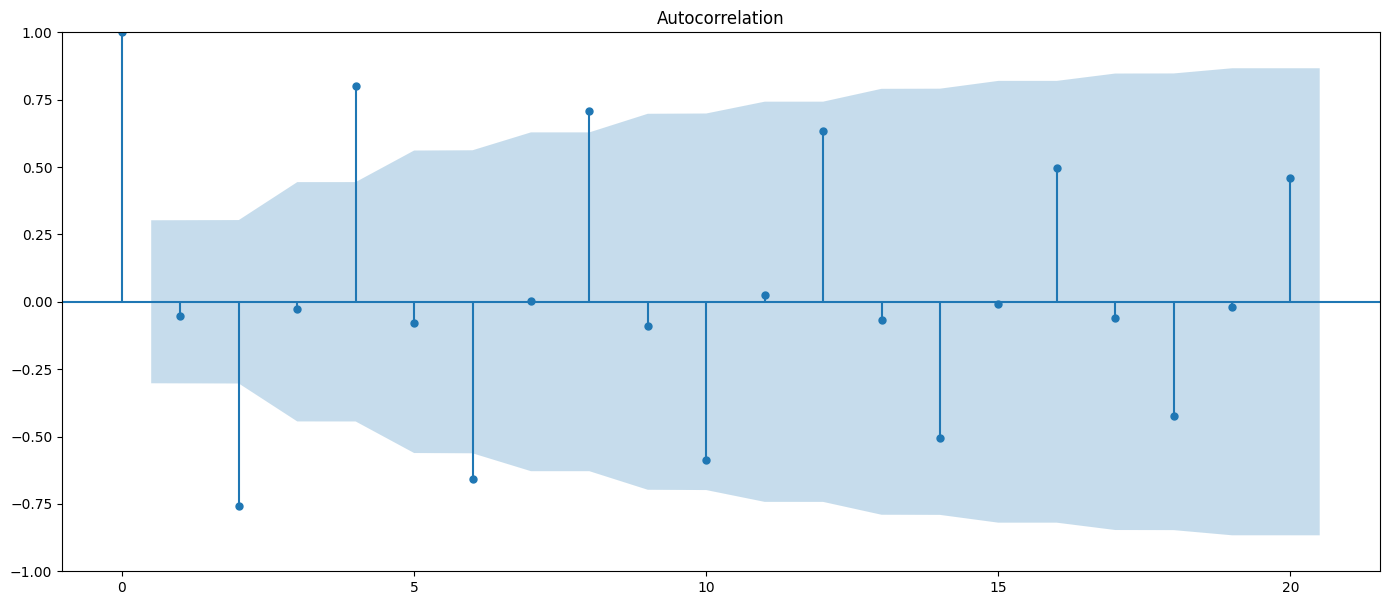

In [29]:
fig, ax = plt.subplots(figsize=(17, 7))
sm.graphics.tsa.plot_acf(p, lags=20, ax=ax)
plt.show()

In [30]:
path_a10 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\a10.csv"
a10 = pd.read_csv(path_a10)

a10.head()

,Date,Sales
0,1991.500000,3.526591
1,1991.583333,3.180891
2,1991.666667,3.252221
3,1991.750000,3.611003
4,1991.833333,3.565869


In [34]:
a10.shape

(204, 2)

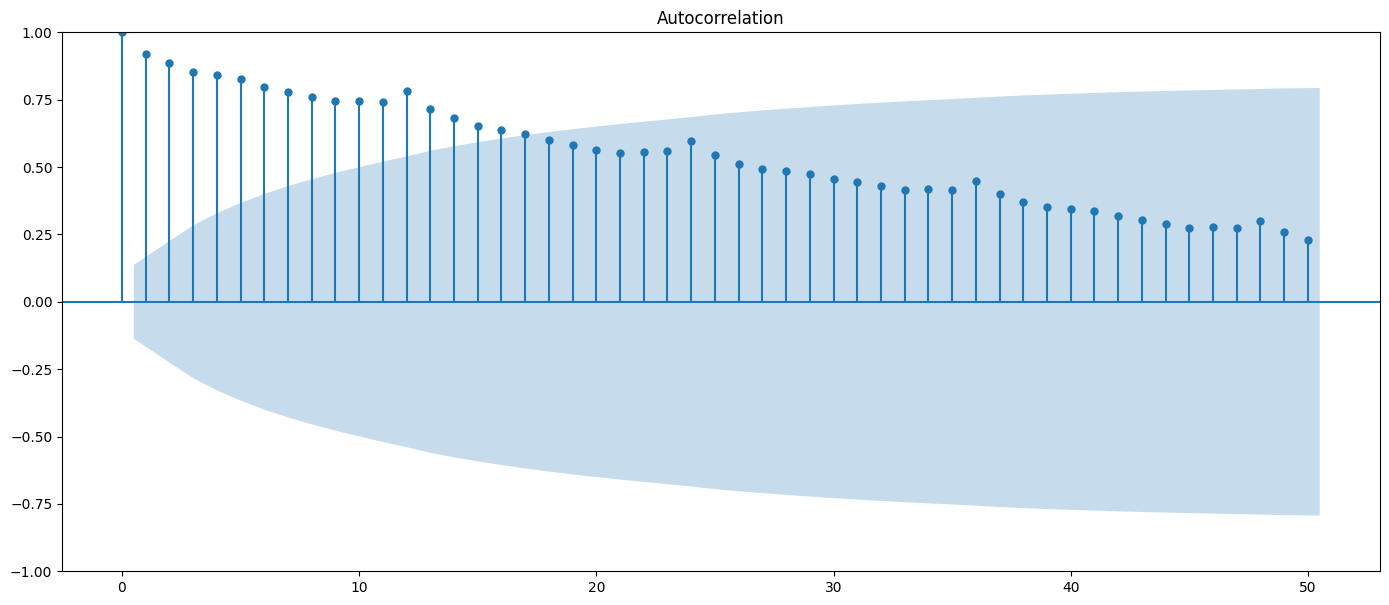

In [41]:
fig, ax = plt.subplots(figsize=(17, 7))
sm.graphics.tsa.plot_acf(a10['Sales'], lags=50, ax=ax)
plt.show()

In [46]:
k = 50
for i in range(1, k+1):
    a10[f'lag_{i}'] = a10['Sales'].shift(i)

a10.tail()

,Date,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50
199,2008.083333,21.654285,29.665356,25.806090,25.250030,23.263340,22.930357,23.930204,21.834890,20.681002,...,16.142005,15.370764,15.339097,13.989472,13.943447,12.882645,12.997900,11.938030,18.003768,16.503966
200,2008.166667,18.264945,21.654285,29.665356,25.806090,25.250030,23.263340,22.930357,23.930204,21.834890,...,16.685754,16.142005,15.370764,15.339097,13.989472,13.943447,12.882645,12.997900,11.938030,18.003768
201,2008.250000,23.107677,18.264945,21.654285,29.665356,25.806090,25.250030,23.263340,22.930357,23.930204,...,17.636728,16.685754,16.142005,15.370764,15.339097,13.989472,13.943447,12.882645,12.997900,11.938030
202,2008.333333,22.912510,23.107677,18.264945,21.654285,29.665356,25.806090,25.250030,23.263340,22.930357,...,18.869325,17.636728,16.685754,16.142005,15.370764,15.339097,13.989472,13.943447,12.882645,12.997900
203,2008.416667,19.431740,22.912510,23.107677,18.264945,21.654285,29.665356,25.806090,25.250030,23.263340,...,20.778723,18.869325,17.636728,16.685754,16.142005,15.370764,15.339097,13.989472,13.943447,12.882645
